In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy.linalg as lin

uklad 2


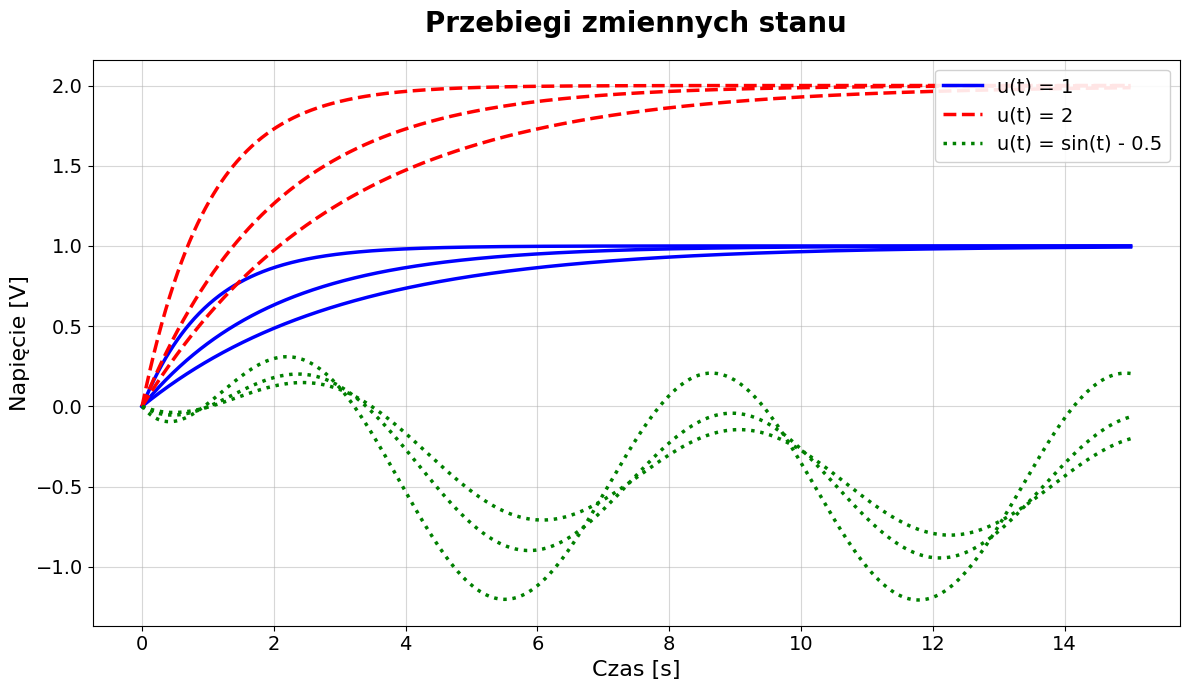


--- TRANSFORMACJA DO POSTACI REGULATOROWEJ ---
Macierz A (postać regulatorowa):
[[ 0.    1.    0.  ]
 [ 0.    0.    1.  ]
 [-0.17 -1.   -1.83]]

Macierz B (postać regulatorowa):
[[-0.]
 [ 0.]
 [ 1.]]


In [43]:
import numpy as np
import scipy.signal as sp
import numpy.linalg as lin
import matplotlib.pyplot as plt

# --- 1. DANE UKŁADU ---
R1, R2, R3 = 1.0, 1.0, 1.0
C1, C2, C3 = 1.0, 2.0, 3.0

# Macierze stanu
A = np.array([[-1 / (R1 * C1), 0, 0], 
              [0, -1 / (R2 * C2), 0], 
              [0, 0, -1 / (R3 * C3)]])
B = np.array([[1 / (R1 * C1)], 
              [1 / (R2 * C2)], 
              [1 / (R3 * C3)]])
C = np.array([[1, 1, 1]]) 
D = np.array([[0]])

# --- 2. SYMULACJA ---
system = sp.StateSpace(A, B, C, D)
t = np.linspace(0, 15, 1000)

# Przypadek 1: u(t) = 1
u1 = np.ones_like(t)
t1, y1, x1 = sp.lsim(system, U=u1, T=t)

# Przypadek 2: u(t) = 2
u2 = 2 * np.ones_like(t)
t2, y2, x2 = sp.lsim(system, U=u2, T=t)

# Przypadek 3: u(t) = sin(t) - 0.5
u3 = np.sin(t) - 0.5
t3, y3, x3 = sp.lsim(system, U=u3, T=t)

# --- 3. RYSOWANIE (DUŻE NAPISY) ---
# figsize=(szerokość, wysokość) - zmienione na (12, 7) dla lepszej proporcji
plt.figure(figsize=(12, 7))

def plot_set(time, states, color, style, label_text):
    # linewidth=2.5 sprawia, że linie są grubsze i wyraźniejsze
    plt.plot(time, states[:, 0], color=color, linestyle=style, linewidth=2.5, label=label_text)
    plt.plot(time, states[:, 1], color=color, linestyle=style, linewidth=2.5)
    plt.plot(time, states[:, 2], color=color, linestyle=style, linewidth=2.5)

# Rysowanie przebiegów
plot_set(t1, x1, 'blue', '-', 'u(t) = 1')
plot_set(t2, x2, 'red', '--', 'u(t) = 2')
plot_set(t3, x3, 'green', ':', 'u(t) = sin(t) - 0.5')

# --- FORMATOWANIE TEKSTU ---
# fontsize kontroluje wielkość tekstu
plt.title('Przebiegi zmiennych stanu', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Napięcie [V]', fontsize=16)

# Powiększenie liczb na osiach (tick labels)
plt.tick_params(axis='both', which='major', labelsize=14)

# Legenda z większą czcionką
plt.legend(fontsize=14, loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.5)

plt.tight_layout() # Automatycznie dopasowuje marginesy, żeby nic nie ucięło
plt.show()


# --- 4. POSTAĆ REGULATOROWA ---
print("\n--- TRANSFORMACJA DO POSTACI REGULATOROWEJ ---")

# Obliczanie macierzy Kalmana K
K = np.hstack([B, A @ B, A @ A @ B])

# Obliczanie wielomianu charakterystycznego
coeffs = np.poly(A)
a2, a1, a0 = coeffs[1], coeffs[2], coeffs[3]

# Macierz As (teoretyczna) i Bs
As_theo = np.array([[0, 1, 0],
                    [0, 0, 1],
                    [-a0, -a1, -a2]])
Bs_theo = np.array([[0], [0], [1]])

# Macierz Kalmana dla układu teoretycznego (Ks)
Ks = np.hstack([Bs_theo, As_theo @ Bs_theo, As_theo @ As_theo @ Bs_theo])

# Obliczanie P zgodnie z instrukcją (Wzór 9: P^-1 = K * Ks^-1)
# Skoro P^-1 = K * inv(Ks), to P = inv(K * inv(Ks)) = Ks * inv(K)
P_inv = K @ lin.inv(Ks)
P = lin.inv(P_inv)

# Wyznaczanie nowych macierzy (Wzór 10: As = P * A * P^-1)
A_reg = P @ A @ lin.inv(P)
B_reg = P @ B

print("Macierz A (postać regulatorowa):")
print(np.round(A_reg, 2))
print("\nMacierz B (postać regulatorowa):")
print(np.round(B_reg, 2))

Macierz Kalmana K:
[[ 0.5  -0.25]
 [ 0.5  -0.25]]
Układ jest NIESTEROWALNY (rząd=1, n=2)


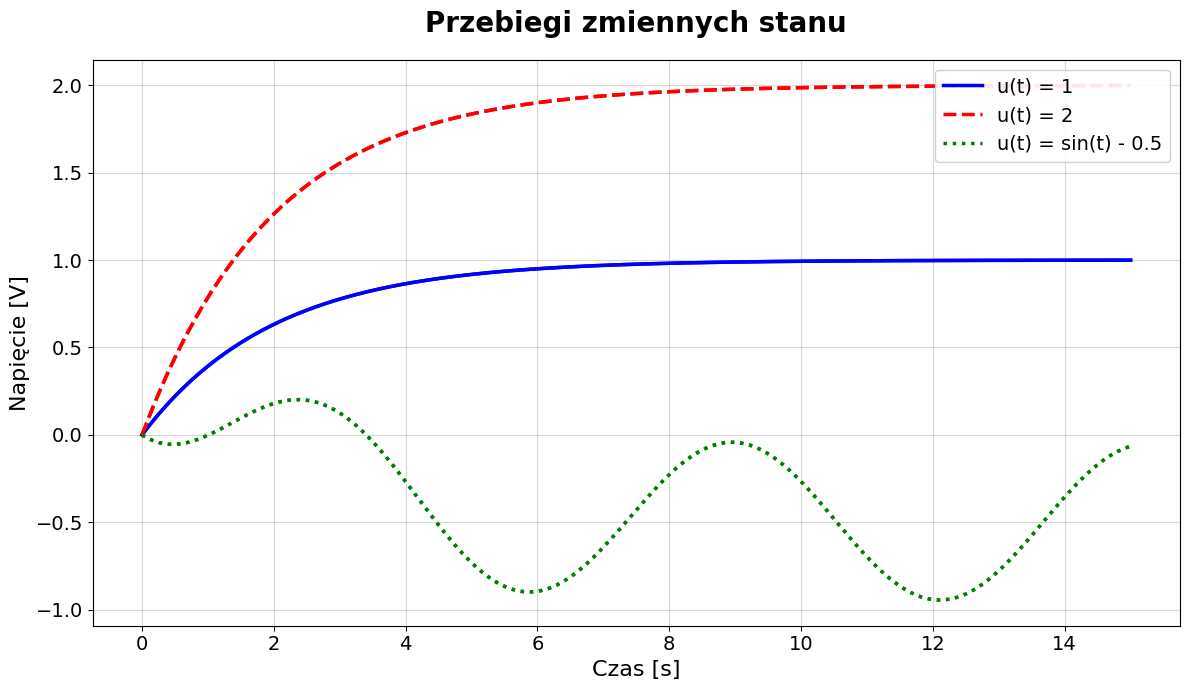


--- TRANSFORMACJA DO POSTACI REGULATOROWEJ ---
Nie można wyznaczyć postaci regulatorowej - układ jest niesterowalny!


In [24]:
# --- 1. DANE UKŁADU (Dla Rys. 1 - dwie gałęzie) ---
C1 = 1.0
C2 = 0.5  # 1/2
R1 = 2.0
R2 = 4.0

# Macierze stanu (2x2)
A = np.array([[-1 / (R1 * C1), 0], 
              [0, -1 / (R2 * C2)]])
B = np.array([[1 / (R1 * C1)], 
              [1 / (R2 * C2)]])
C = np.array([[1, 1]]) 
D = np.array([[0]])

# --- 2. BADANIE STEROWALNOŚCI ---
# Dla układu 2. rzędu macierz Kalmana to K = [B, AB]
K = np.hstack([B, A @ B])
rank_K = lin.matrix_rank(K)
n = A.shape[0]

print(f"Macierz Kalmana K:\n{K}")
if rank_K == n:
    print(f"Układ jest STEROWALNY (rząd={rank_K}, n={n})")
else:
    print(f"Układ jest NIESTEROWALNY (rząd={rank_K}, n={n})")

# --- 3. SYMULACJA ---
system = sp.StateSpace(A, B, C, D)
t = np.linspace(0, 15, 1000)

# Przypadek 1: u(t) = 1
u1 = np.ones_like(t)
t1, y1, x1 = sp.lsim(system, U=u1, T=t)

# Przypadek 2: u(t) = 2
u2 = 2 * np.ones_like(t)
t2, y2, x2 = sp.lsim(system, U=u2, T=t)

# Przypadek 3: u(t) = sin(t) - 0.5
u3 = np.sin(t) - 0.5
t3, y3, x3 = sp.lsim(system, U=u3, T=t)

# --- 4. RYSOWANIE (Dostosowane do 2 zmiennych) ---
plt.figure(figsize=(12, 7))

def plot_set(time, states, color, style, label_text):
    # Rysujemy tylko 2 stany (kolumna 0 i kolumna 1)
    plt.plot(time, states[:, 0], color=color, linestyle=style, linewidth=2.5, label=label_text)
    plt.plot(time, states[:, 1], color=color, linestyle=style, linewidth=2.5)

# Rysowanie przebiegów
plot_set(t1, x1, 'blue', '-', 'u(t) = 1')
plot_set(t2, x2, 'red', '--', 'u(t) = 2')
plot_set(t3, x3, 'green', ':', 'u(t) = sin(t) - 0.5')

# Formatowanie
plt.title('Przebiegi zmiennych stanu', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Napięcie [V]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, loc='upper right', framealpha=0.9)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# --- 5. POSTAĆ REGULATOROWA ---
print("\n--- TRANSFORMACJA DO POSTACI REGULATOROWEJ ---")

if rank_K == n:
    # 1. Wielomian charakterystyczny: s^2 + a1*s + a0
    # np.poly zwraca [1, a1, a0] dla macierzy 2x2
    coeffs = np.poly(A)
    a1, a0 = coeffs[1], coeffs[2]
    
    # 2. Teoretyczna macierz As (2x2)
    # Postać:
    # [ 0   1 ]
    # [-a0 -a1]
    As_theo = np.array([[0, 1],
                        [-a0, -a1]])
    
    # 3. Teoretyczna macierz Bs (2x1)
    Bs_theo = np.array([[0], 
                        [1]])

    # 4. Macierz Kalmana dla układu teoretycznego (Ks)
    Ks = np.hstack([Bs_theo, As_theo @ Bs_theo])

    # 5. Obliczanie P
    # Wzór: P^-1 = K * Ks^-1  =>  P = Ks * K^-1 (lub odwrotność tamtego wyniku)
    P_inv = K @ lin.inv(Ks)
    P = lin.inv(P_inv)

    # 6. Transformacja
    A_reg = P @ A @ lin.inv(P)
    B_reg = P @ B

    print("Macierz A (postać regulatorowa):")
    print(np.round(A_reg, 2))
    print("\nMacierz B (postać regulatorowa):")
    print(np.round(B_reg, 2))
else:
    print("Nie można wyznaczyć postaci regulatorowej - układ jest niesterowalny!")

Układ oryginalny jest NIESTEROWALNY
rank(K)=1
n=2


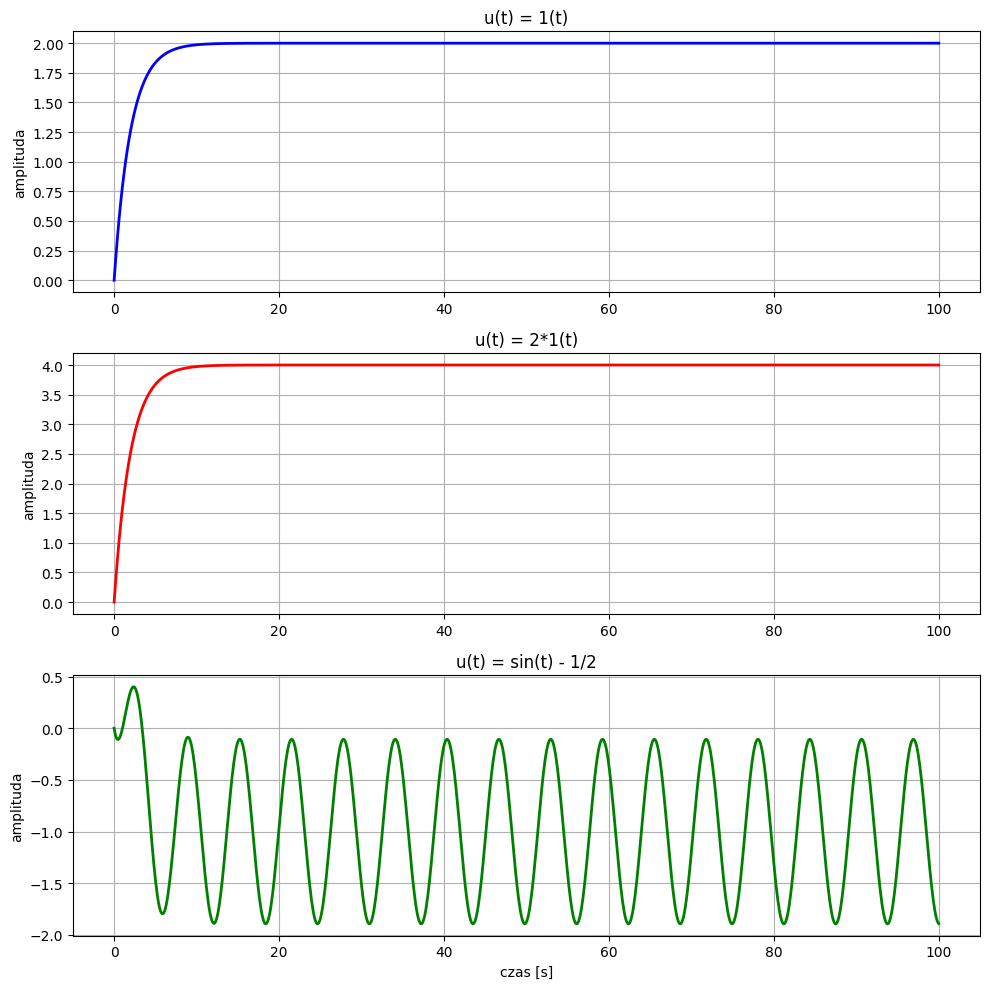

In [30]:
C1 = 1
C2 = 1 / 2
R1 = 2
R2 = 4

A = np.array([[-1 / (R1 * C1), 0], [0, -1 / (R2 * C2)]])
B = np.array([[1 / (R1 * C1)], [1 / (R2 * C2)]])
C = [1, 1]
D = 0

K = np.hstack([B, A @ B])
wiersze = K.shape[0]

if lin.matrix_rank(K) == wiersze:
    print("Układ oryginalny jest STEROWALNY")
    print(f"rank(K)={lin.matrix_rank(K)}")
    print(f"n={wiersze}")
else:
    print("Układ oryginalny jest NIESTEROWALNY")
    print(f"rank(K)={lin.matrix_rank(K)}")
    print(f"n={wiersze}")

system = sp.StateSpace(A, B, C, D)

# P_1 = np.hstack([B, A @ B])

# A1 = lin.inv(P_1) @ A @ P_1
# B1 = lin.inv(P_1) @ B
# C1_reg = np.array(C) @ P_1
# D1 = D

# sys = sp.StateSpace(A1, B1, C1_reg, D1)

# K_reg = np.hstack([B1, A1 @ B1])
# wiersze_reg = K_reg.shape[0]

# if lin.matrix_rank(K_reg) == wiersze_reg:
#     print("Układ w postaci regulatorowej jest STEROWALNY")
# else:
#     print("Układ w postaci regulatorowej jest NIESTEROWALNY")

t = np.linspace(0, 100, 1000)

t, y = sp.step(system, T=t)

u2 = np.ones_like(t) * 2
t2, y2, _ = sp.lsim(system, U=u2, T=t)

u3 = np.sin(t) - 0.5
t3, y3, _ = sp.lsim(system, U=u3, T=t)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t, y, "b-", linewidth=2)
plt.grid(True)
plt.ylabel("amplituda")
plt.title("u(t) = 1(t)")

plt.subplot(3, 1, 2)
plt.plot(t2, y2, "r-", linewidth=2)
plt.grid(True)
plt.ylabel("amplituda")
plt.title("u(t) = 2*1(t)")

plt.subplot(3, 1, 3)
plt.plot(t3, y3, "g-", linewidth=2)
plt.grid(True)
plt.xlabel("czas [s]")
plt.ylabel("amplituda")
plt.title("u(t) = sin(t) - 1/2")

plt.tight_layout()
plt.show()

Układ oryginalny jest STEROWALNY
rank(K)=3
n=3


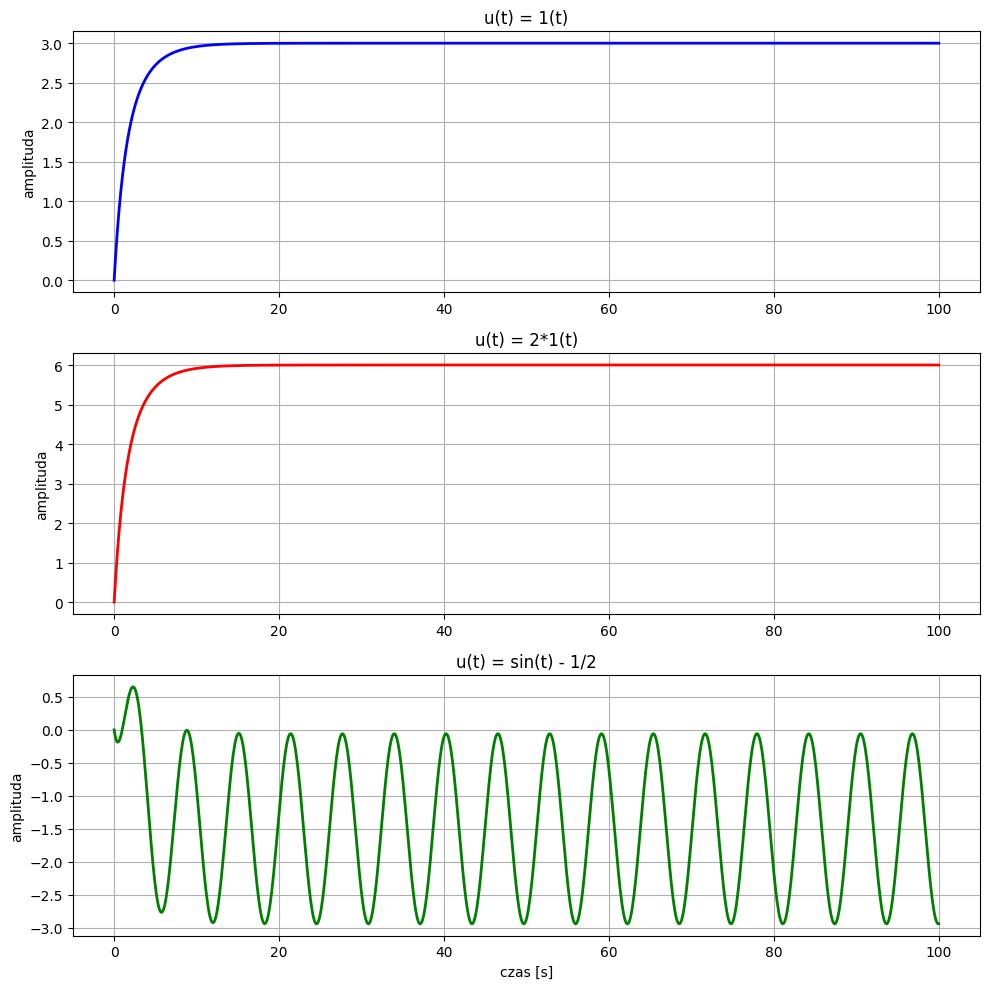

In [3]:
R1 = 1
R2 = 1
R3 = 1
C1 = 1
C2 = 2
C3 = 3

A = np.array([[-1 / (R1 * C1), 0, 0], [0, -1 / (R2 * C2), 0], [0, 0, -1 / (R3 * C3)]])
B = np.array([[1 / (R1 * C1)], [1 / (R2 * C2)], [1 / (R3 * C3)]])
C = [1, 1, 1]
D = 0

# CZYTANIE KILKU ZMIENNYCH STANU I NA JEDNYM WYKRESIE
# DOPIERO WTEDY MOZNA STWIERDZIC CZY JEST STEROWALNY CZY NIE

K = np.hstack([B, A @ B, A @ A @ B])
wiersze = K.shape[0]
if lin.matrix_rank(K) == wiersze:
    print("Układ oryginalny jest STEROWALNY")
    print(f"rank(K)={lin.matrix_rank(K)}")
    print(f"n={wiersze}")
else:
    print("Układ oryginalny jest NIESTEROWALNY")
    print(f"rank(K)={lin.matrix_rank(K)}")
    print(f"n={wiersze}")

system = sp.StateSpace(A, B, C, D)

t = np.linspace(0, 100, 1000)

t, y = sp.step(system, T=t)

u2 = np.ones_like(t) * 2
t2, y2, _ = sp.lsim(system, U=u2, T=t)

u3 = np.sin(t) - 0.5
t3, y3, _ = sp.lsim(system, U=u3, T=t)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(t, y, "b-", linewidth=2)
plt.grid(True)
plt.ylabel("amplituda")
plt.title("u(t) = 1(t)")

plt.subplot(3, 1, 2)
plt.plot(t2, y2, "r-", linewidth=2)
plt.grid(True)
plt.ylabel("amplituda")
plt.title("u(t) = 2*1(t)")

plt.subplot(3, 1, 3)
plt.plot(t3, y3, "g-", linewidth=2)
plt.grid(True)
plt.xlabel("czas [s]")
plt.ylabel("amplituda")
plt.title("u(t) = sin(t) - 1/2")

plt.tight_layout()
plt.show()

In [27]:
print("--- WYZNACZANIE POSTACI STEROWALNEJ DLA RYS. 2 ---")

# Dane układu z Rys. 2
R1, R2, R3 = 1.0, 1.0, 1.0
C1, C2, C3 = 1.0, 2.0, 3.0

# 1. Definicja modelu oryginalnego
A = np.array([
    [-1 / (R1 * C1), 0, 0], 
    [0, -1 / (R2 * C2), 0], 
    [0, 0, -1 / (R3 * C3)]
])
B = np.array([
    [1 / (R1 * C1)], 
    [1 / (R2 * C2)], 
    [1 / (R3 * C3)]
])

# 2. Sprawdzenie sterowalności (Macierz Kalmana)
K = np.hstack([B, A @ B, A @ A @ B])
rzad = lin.matrix_rank(K)
n = A.shape[0]

print(f"Rząd macierzy Kalmana: {rzad}/{n}")
if rzad < n:
    print("BŁĄD: Układ jest niesterowalny, nie można wyznaczyć postaci sterowalnej.")

# 3. Wyznaczenie współczynników wielomianu charakterystycznego
# Funkcja np.poly zwraca współczynniki [1, a_n-1, ..., a_1, a_0]
# Dla n=3: [1, a2, a1, a0]
coeffs = np.poly(A)
a2 = coeffs[1]
a1 = coeffs[2]
a0 = coeffs[3]

print(f"\nWspółczynniki wielomianu charakterystycznego:")
print(f"a2 = {a2:.4f}")
print(f"a1 = {a1:.4f}")
print(f"a0 = {a0:.4f}")

# 4. Konstrukcja macierzy w postaci sterowalnej (Regulatorowej)
# Zgodnie ze wzorem (6) z instrukcji
As = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [-a0, -a1, -a2]
])

Bs = np.array([
    [0],
    [0],
    [1]
])

print("\n--- WYNIK: POSTAĆ STEROWALNA ---")
print("Macierz As:")
print(As)
print("\nMacierz Bs:")
print(Bs)

# 5. Opcjonalnie: Weryfikacja macierzy transformacji P
# Wzór z instrukcji: P_inv = K * Ks^-1 (gdzie Ks to macierz Kalmana dla As, Bs)
Ks = np.hstack([Bs, As @ Bs, As @ As @ Bs])
# Macierz transformacji P (z układu oryginalnego do sterowalnego x_s = Px)
# P = inv(K * inv(Ks)) -> P = Ks * inv(K)
# Uwaga: w instrukcji jest P^-1 = ... więc P = (P^-1)^-1
P_inv = K @ lin.inv(Ks) 
P = lin.inv(P_inv)

print("\nMacierz transformacji P:")
print(P)

# Sprawdzenie poprawności: As powinno być równe P * A * P^-1
As_check = P @ A @ lin.inv(P)
print("\nWeryfikacja (P * A * P^-1):")
# Używamy np.round, aby ukryć błędy numeryczne (zera maszynowe)
print(np.round(As_check, 4))

--- WYZNACZANIE POSTACI STEROWALNEJ DLA RYS. 2 ---
Rząd macierzy Kalmana: 3/3

Współczynniki wielomianu charakterystycznego:
a2 = 1.8333
a1 = 1.0000
a0 = 0.1667

--- WYNIK: POSTAĆ STEROWALNA ---
Macierz As:
[[ 0.          1.          0.        ]
 [ 0.          0.          1.        ]
 [-0.16666667 -1.         -1.83333333]]

Macierz Bs:
[[0]
 [0]
 [1]]

Macierz transformacji P:
[[  3. -24.  27.]
 [ -3.  12.  -9.]
 [  3.  -6.   3.]]

Weryfikacja (P * A * P^-1):
[[ 0.      1.      0.    ]
 [ 0.      0.      1.    ]
 [-0.1667 -1.     -1.8333]]


Macierz A (sterowalna):
 [[ 0.    1.    0.  ]
 [-0.   -0.    1.  ]
 [-0.17 -1.   -1.83]]
Macierz C (sterowalna):
 [[0.5  2.   1.83]]


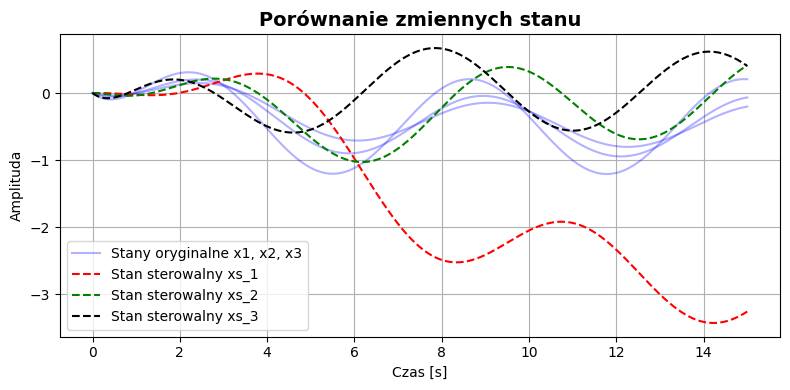

In [42]:
import numpy as np
import scipy.signal as sp
import numpy.linalg as lin
import matplotlib.pyplot as plt

# 1. DANE UKŁADU
R1, R2, R3 = 1.0, 1.0, 1.0
C1, C2, C3 = 1.0, 2.0, 3.0

# Model oryginalny
A = np.array([[-1 / (R1 * C1), 0, 0], 
                [0, -1 / (R2 * C2), 0], 
                [0, 0, -1 / (R3 * C3)]])
B = np.array([[1 / (R1 * C1)], 
                [1 / (R2 * C2)], 
                [1 / (R3 * C3)]])
C = np.array([[1, 1, 1]]) 
D = np.array([[0]])

# 2. TRANSFORMACJA DO POSTACI STEROWALNEJ
# Obliczenie macierzy Kalmana (K) dla układu oryginalnego
K_orig = np.hstack([B, A @ B, A @ A @ B])

# Wyznaczenie współczynników wielomianu charakterystycznego
coeffs = np.poly(A)
a2, a1, a0 = coeffs[1], coeffs[2], coeffs[3]

# Budowa teoretycznej macierzy As i Bs (Postać sterowalna)
As_target = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [-a0, -a1, -a2]
])
Bs_target = np.array([[0], [0], [1]])

# Macierz Kalmana dla układu docelowego (Ks)
Ks_target = np.hstack([Bs_target, As_target @ Bs_target, As_target @ As_target @ Bs_target])

# Wyznaczenie macierzy transformacji P
# Zgodnie z teorią: x_s = P * x  =>  P = Ks * inv(K)
# Lub wg instrukcji (wzór 9): P^-1 = K * Ks^-1
P_inv = K_orig @ lin.inv(Ks_target)
P = lin.inv(P_inv)

# Przeliczenie macierzy do postaci sterowalnej
A_reg = P @ A @ P_inv
B_reg = P @ B
C_reg = C @ P_inv
D_reg = D

print("Macierz A (sterowalna):\n", np.round(A_reg, 2))
print("Macierz C (sterowalna):\n", np.round(C_reg, 2))

# 3. SYMULACJA
system_orig = sp.StateSpace(A, B, C, D)
system_reg = sp.StateSpace(A_reg, B_reg, C_reg, D_reg)

t = np.linspace(0, 15, 1000)
u = np.sin(t) - 0.5 # Wymuszenie z zadania 1.3c

# Symulacja
t_orig, y_orig, x_orig = sp.lsim(system_orig, U=u, T=t)
t_reg, y_reg, x_reg = sp.lsim(system_reg, U=u, T=t)



# 4. RYSOWANIE
plt.figure(figsize=(8, 4))

# Wykres 1: Porównanie WYJŚĆ (y)
# plt.subplot(2, 1, 1)
# plt.plot(t_orig, y_orig, 'b-', linewidth=4, alpha=0.5, label='Wyjście układu oryginalnego (y)')
# plt.plot(t_reg, y_reg, 'r--', linewidth=2, label='Wyjście postaci sterowalnej (y_s)')
# plt.title('Porównanie wyjść', fontsize=14, fontweight='bold')
# plt.xlabel('Czas [s]')
# plt.ylabel('Amplituda')
# plt.legend()
# plt.grid(True)

# Wykres 2: Porównanie ZMIENNYCH STANU (x)
# plt.subplot(2, 1, 2)
# Stany oryginalne
plt.plot(t_orig, x_orig[:, 0], 'b-', alpha=0.3, label='Stany oryginalne x1, x2, x3')
plt.plot(t_orig, x_orig[:, 1], 'b-', alpha=0.3)
plt.plot(t_orig, x_orig[:, 2], 'b-', alpha=0.3)
# Stany sterowalne
plt.plot(t_reg, x_reg[:, 0], 'r--', label='Stan sterowalny xs_1')
plt.plot(t_reg, x_reg[:, 1], 'g--', label='Stan sterowalny xs_2')
plt.plot(t_reg, x_reg[:, 2], 'k--', label='Stan sterowalny xs_3')

plt.title('Porównanie zmiennych stanu', fontsize=14, fontweight='bold')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Współczynniki układu otwartego: [1.    1.833 1.    0.167]
Macierz K obliczona: [[ 9.8333 16.      6.1667]]


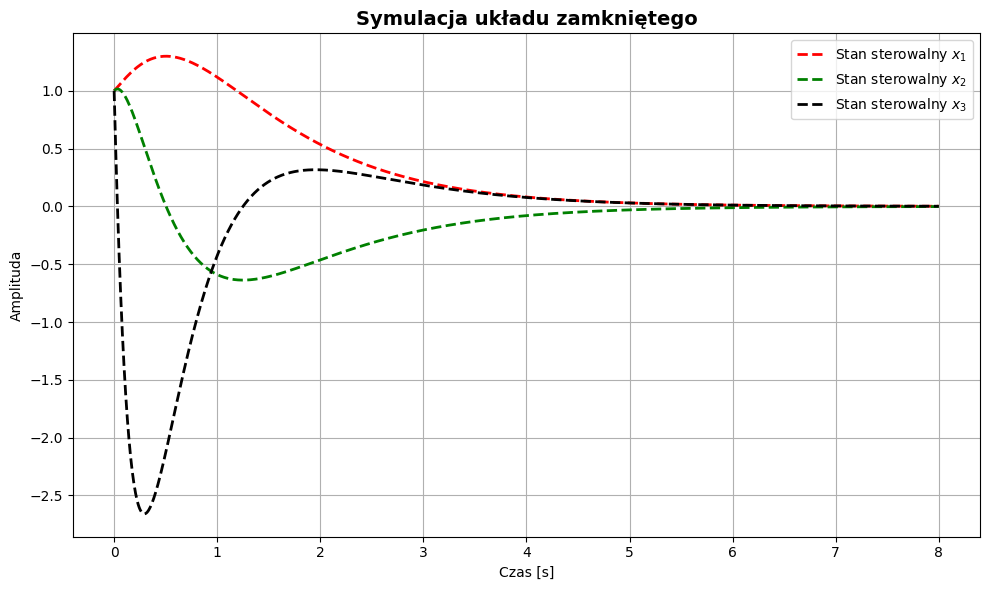

In [54]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

# 1. PARAMETRY I WSPÓŁCZYNNIKI
# Parametry fizyczne (potrzebne tylko do wyznaczenia współczynników wielomianu otwartego)
R1, R2, R3 = 1.0, 1.0, 1.0
C1, C2, C3 = 1.0, 2.0, 3.0

# Bieguny układu otwartego: -1/RC
# s1 = -1.0, s2 = -0.5, s3 = -0.333...
poles_open = [-1/(R1*C1), -1/(R2*C2), -1/(R3*C3)]
coeffs_open = np.poly(poles_open) # [1, a2, a1, a0]
a2, a1, a0 = coeffs_open[1], coeffs_open[2], coeffs_open[3]

# 2. DEFINICJA UKŁADU W POSTACI STEROWALNEJ (MODEL MATEMATYCZNY)
A_s = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [-a0, -a1, -a2]
])
B_s = np.array([[0], [0], [1]])
C_s = np.array([[1, 0, 0]]) # Przykładowe wyjście (zazwyczaj y = x1 w tej postaci)
D_s = np.array([[0]])

# 3. OBLICZENIE K (LOKOWANIE BIEGUNÓW)
# Cel: s^3 + 8s^2 + 17s + 10
coeffs_target = [1, 8, 17, 10]

# W postaci sterowalnej K to różnica współczynników
k3 = coeffs_target[1] - a2
k2 = coeffs_target[2] - a1
k1 = coeffs_target[3] - a0

K_s = np.array([[k1, k2, k3]])

print(f"Współczynniki układu otwartego: {np.round(coeffs_open, 3)}")
print(f"Macierz K obliczona: {np.round(K_s, 4)}")

# 4. SYMULACJA UKŁADU ZAMKNIĘTEGO
# Macierz dynamiczna układu zamkniętego
A_closed = A_s - B_s @ K_s

# System
sys_closed = sp.StateSpace(A_closed, B_s, C_s, D_s)

# Czas i warunki początkowe
t = np.linspace(0, 8, 1000)
x0_s = [1, 1, 1] # Warunek początkowy dla zmiennych stanu postaci sterowalnej

# Symulacja (odpowiedź swobodna)
u_zero = np.zeros(len(t))
t, y, x_s = sp.lsim(sys_closed, U=u_zero, T=t, X0=x0_s)

# 5. RYSOWANIE
plt.figure(figsize=(10, 6))

# Rysujemy tylko stany sterowalne zgodnie z życzeniem
plt.plot(t, x_s[:, 0], 'r--', linewidth=2, label='Stan sterowalny $x_1$')
plt.plot(t, x_s[:, 1], 'g--', linewidth=2, label='Stan sterowalny $x_2$')
plt.plot(t, x_s[:, 2], 'k--', linewidth=2, label='Stan sterowalny $x_3$')

plt.title('Symulacja układu zamkniętego', fontsize=14, fontweight='bold')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()